In [1]:
from urllib.response import addinfo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
next_steps = """
1. Load data into a pandas dataframe
2. Check for missing values
3. Check for outliers
4. Visualize the distribution of the data
5. Check for correlation between columns
6. Check data types of columns
7. Check for duplicates
8. Clean the data if necessary
9. Perform feature engineering if necessary
10. Split data into training and test sets
"""


In [2]:

master_df=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\4285549-Python_Mini_Project_-_Social_Media_Combat\Students Social Media Addiction (1).csv")


In [3]:

master_df = master_df.loc[:, ~master_df.columns.str.contains('^Unnamed')]


In [4]:
master_df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


# Preliminary-end examination of the data
1. check for the missing data
2. check for outliers
3. check for duplicates
4. data types
5. create two subsets for the categorical and numerical variables
6. data shape
7. summary statistics
8. data visualization
9. inference over the visualization

In [5]:
# getting the data shape
master_df.shape

(705, 13)

In [6]:
# getting the data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
master_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [8]:
# everything in this data is contributing to the social media addiction problem in students therefore removal of the columns is not required

# but just for the eval purposes
'''
master_df=master_df.drop(columns=['Customer ID', 'Customer First Order Date'])
master_df=master_df.iloc[:, 2:]
'''

"\nmaster_df=master_df.drop(columns=['Customer ID', 'Customer First Order Date'])\nmaster_df=master_df.iloc[:, 2:]\n"

In [9]:
# lets check for the missing values
master_df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [10]:
# the data is not missing any values and is well-prepared for the analysis

In [11]:
# Perform appropriate data type conversions if required.
master_df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [12]:
'''
see the info from the 5 number summary we can clearly see that the average score of addiction is 6.43
'''
'''
lets find out why this is happening'''

'\nlets find out why this is happening'

# 1. Aggregation & Insights


In [13]:

master_df.groupby('Gender')['Addicted_Score'].mean()



Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64

In [14]:
'''the avg addiction score is nearly the same for both genders which is not a good sign since it is more than the moderate range
that should have been less than 6 and in between 4 and 6'''

'the avg addiction score is nearly the same for both genders which is not a good sign since it is more than the moderate range\nthat should have been less than 6 and in between 4 and 6'

<Axes: xlabel='Gender', ylabel='Addicted_Score'>

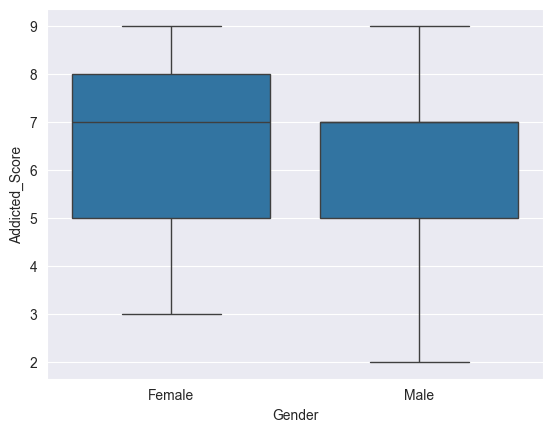

In [15]:
'''lets understand the spread of the data for the addiction score according to the gender'''

sns.boxplot(x='Gender', y='Addicted_Score', data=master_df)

In [16]:
''' Now here comes one more question, why is the spread so high for the females?'''
'''what can be the probable reason for this?
it could be the AGE
'''
'''
LETS evaluate the above hypothesis
'''

'\nLETS evaluate the above hypothesis\n'

<Axes: xlabel='Age', ylabel='Addicted_Score'>

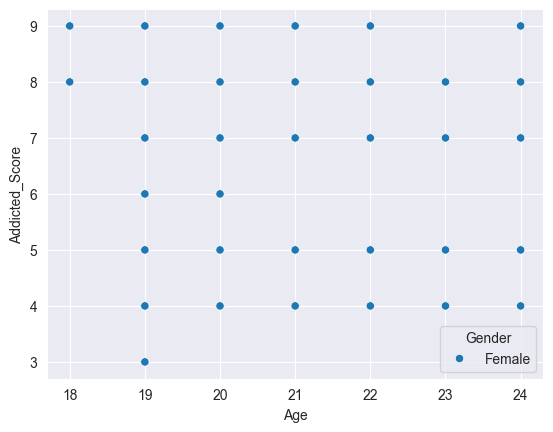

In [17]:
'''
Finding the patterns between the Gender(Female) -Age-Addicted_Score
'''
sns.scatterplot(x='Age', y='Addicted_Score', hue='Gender', data=master_df[master_df['Gender']=="Female"])

In [18]:
pivot_df = master_df.pivot_table(index='Age', columns='Gender', values='Addicted_Score', aggfunc='mean')
print(pivot_df)

Gender    Female      Male
Age                       
18      8.800000  7.222222
19      6.600000  6.892857
20      6.438356  6.789474
21      6.645161  6.576000
22      6.461538  6.059701
23      5.533333  5.789474
24      6.500000  5.944444


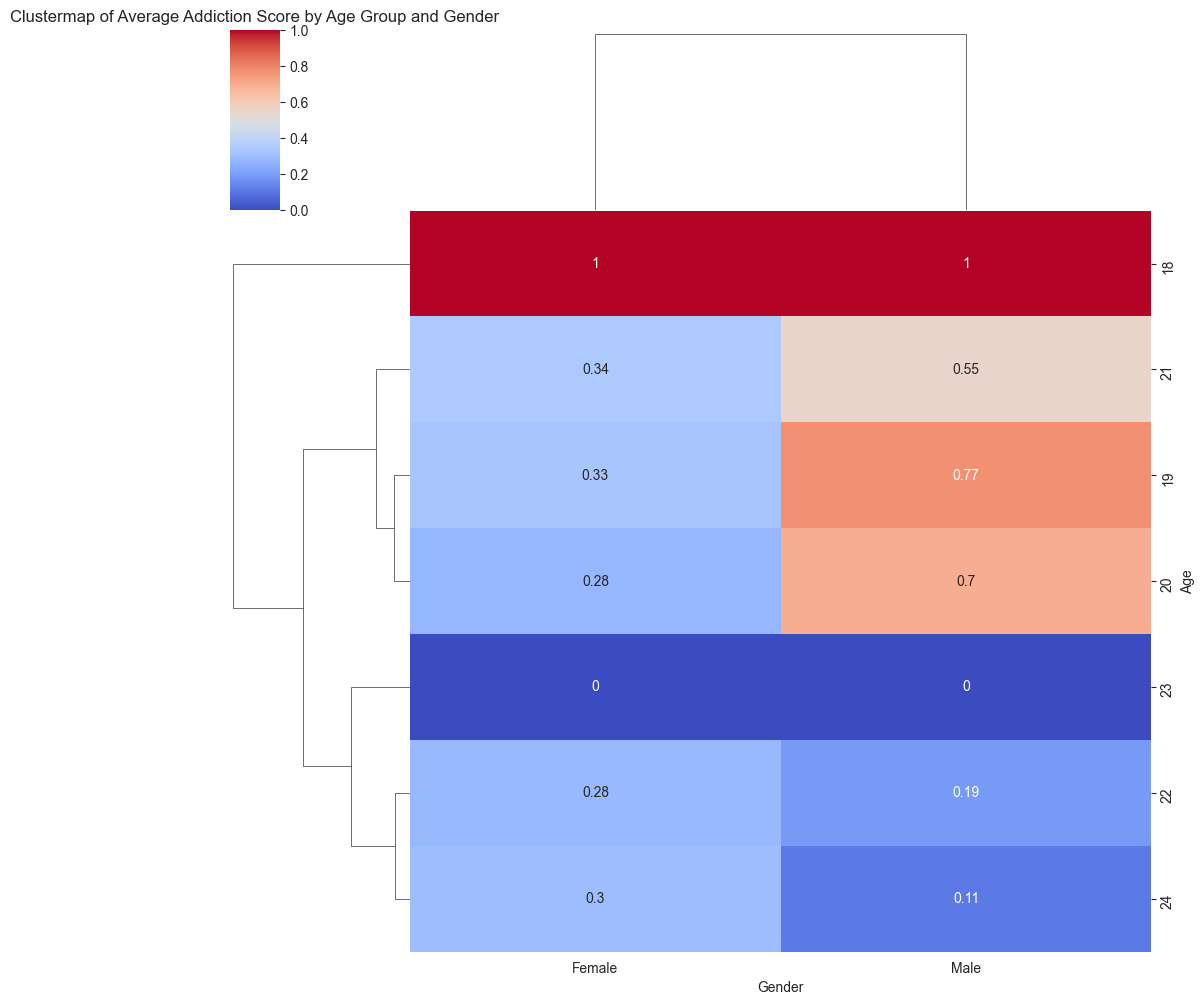

In [19]:
sns.clustermap(pivot_df, cmap='coolwarm', annot=True, standard_scale=1)
plt.title("Clustermap of Average Addiction Score by Age Group and Gender")
plt.show()


In [20]:
''' from the above plot we can see that the average addiction score is higher for the females as compared to males even when it comes to the age factor
hence our hypothesis is correct

lesser the age, higher the addiction score and this trends to be true for males as well
since the person will have more time to spend on social media because they are unemployed and ample time to spend on social media'''

'''
but the cluster map shows one more insight
that is that the average addiction score is higher for the males as compared to females even when it comes
to the lower age factor

'''

'\nbut the cluster map shows one more insight\nthat is that the average addiction score is higher for the males as compared to females even when it comes\nto the lower age factor\n\n'

In [21]:
# NOW LETS CHECK THE ADDICTION SCORE ACCORDING TO THE DEMOGRAPHICS
master_df.groupby('Country')['Addicted_Score'].mean()

Country
Afghanistan     5.0
Albania         7.0
Andorra         8.0
Argentina       8.0
Armenia         9.0
               ... 
Uzbekistan      8.0
Vatican City    7.0
Venezuela       5.0
Vietnam         5.0
Yemen           7.0
Name: Addicted_Score, Length: 110, dtype: float64

<Axes: xlabel='Country', ylabel='Addicted_Score'>

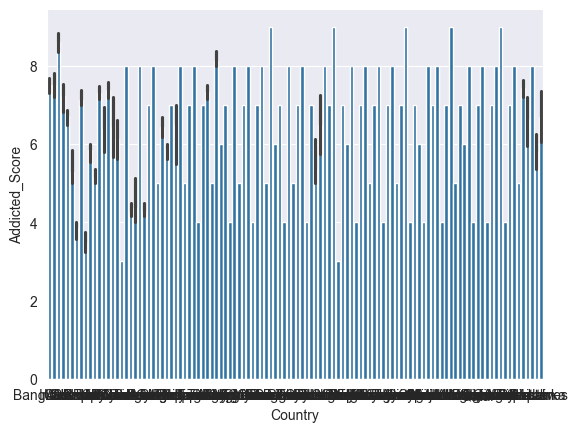

In [22]:
# lets plot the above data
sns.barplot(x='Country', y='Addicted_Score', data=master_df)

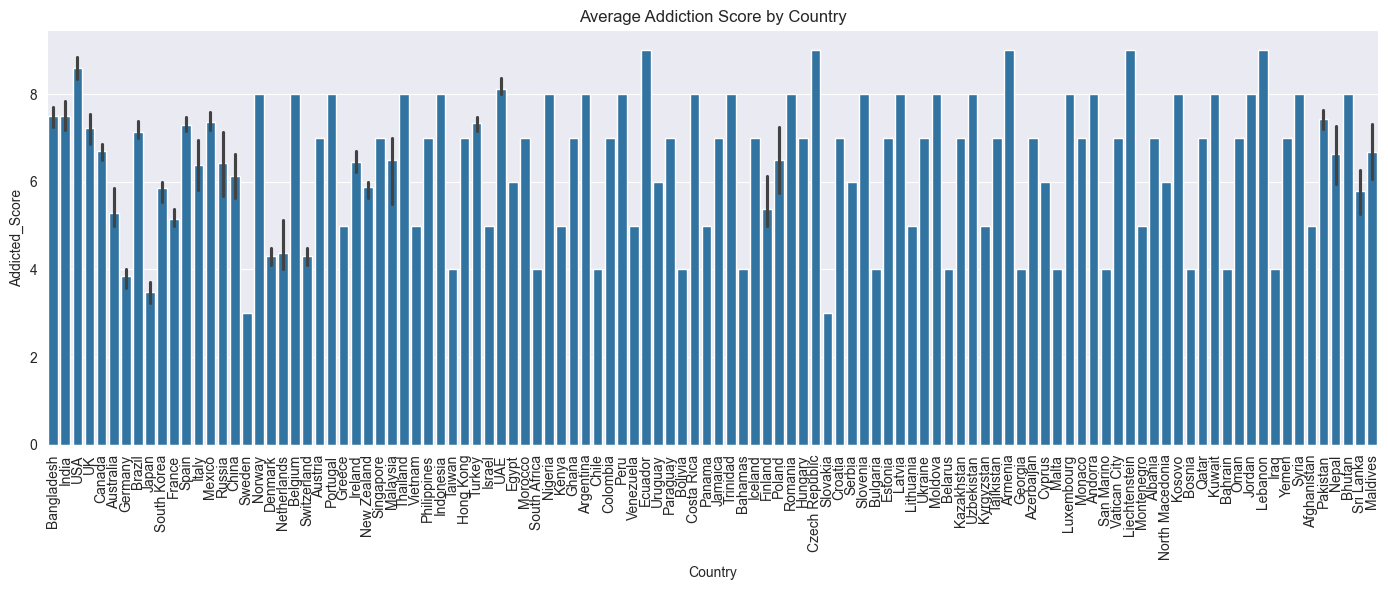

In [23]:
# since the readiness of the data is low we can't draw any conclusions from this plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))  # Wider figure
sns.barplot(x='Country', y='Addicted_Score', data=master_df)

plt.xticks(rotation=90)     # Rotate x-axis labels
plt.title("Average Addiction Score by Country")
plt.tight_layout()
plt.show()


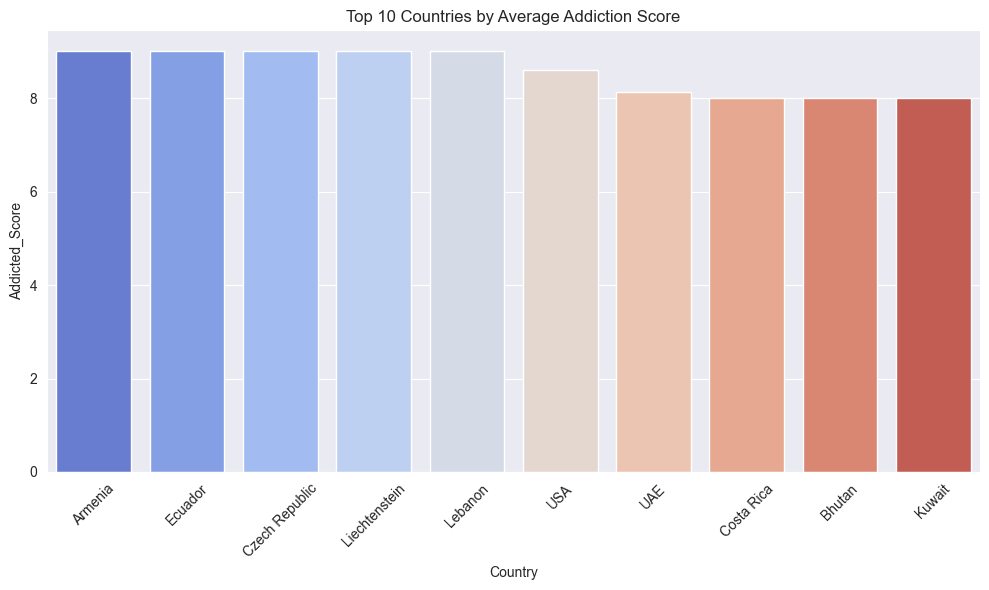

In [24]:
# Top N Countries
top_countries = (
    master_df.groupby('Country')['Addicted_Score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Addicted_Score', data=top_countries, palette='coolwarm')

plt.title("Top 10 Countries by Average Addiction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
'''From the above plot we can see that the countries with higher addiction scores
why is this happening?
what are the probable reasons behind this?

The Reason Can be: Employment Status
since less employment means more time to spend on social media and hence higher addiction score
'''


'From the above plot we can see that the countries with higher addiction scores\nwhy is this happening?\nwhat are the probable reasons behind this?\n\nThe Reason Can be: Employment Status\nsince less employment means more time to spend on social media and hence higher addiction score\n'

In [26]:
pivot2_df=master_df.pivot_table(index='Country', columns='Academic_Level', values='Addicted_Score', aggfunc='mean')

ValueError: The condensed distance matrix must contain only finite values.

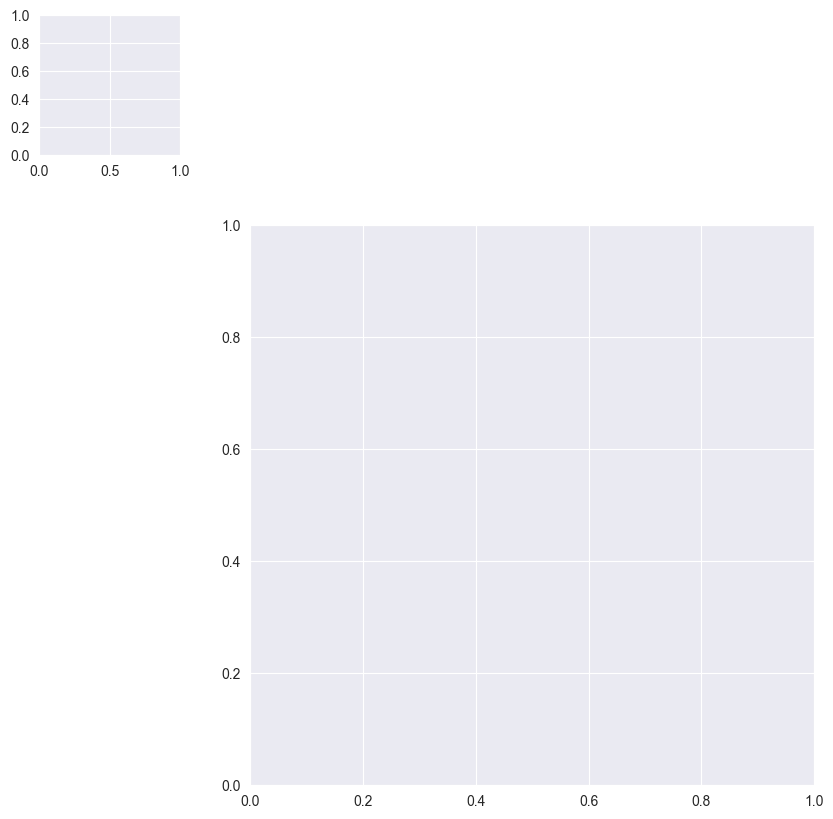

In [27]:
sns.clustermap(pivot2_df, cmap='coolwarm', annot=True, standard_scale=1)
plt.title("Clustermap of Average Addiction Score by Academic Level and Country")
plt.show()

## lets create a function that will check and classify the addiction score based on the scale from low-medium-high

In [14]:
# lets first see how the data looks like for it
master_df.iloc[:100, 12:]

,Addicted_Score
0,8
1,3
2,9
3,4
4,7
...,...
95,7
96,8
97,4
98,7


In [33]:
# now we want to group the data based on the addiction score and then classify them based on the scale
# lets crosstab the data based on the student id and addiction score
score_group = pd.crosstab(master_df['Student_ID'], master_df['Addicted_Score'])

addiction_score = score_group.loc[702][score_group.loc[702]==1].index[0]
print(addiction_score)

9


In [34]:
master_df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [39]:
# lets create a function that will check and classify the addiction score based on the scale from low-medium-high
# now the user will select the student_id from the score_group and then the function will return the addiction score based on the scale
student_id =int(input("Enter the student id(1-705): "))

def get_addiction_score(student_id):
    if student_id in score_group.index:
        print("Student_ID Matches!")
        addiction_score = score_group.loc[student_id][score_group.loc[student_id]==1].index[0]
        print(f"Addiction Score: {addiction_score}")
        if addiction_score >= 1 and addiction_score <= 3:
            print("Low Addiction")
        elif addiction_score >= 4 and addiction_score <= 6:
            print("Medium Addiction")
        else:
            print("High Addiction")
get_addiction_score(student_id)

Student_ID Matches!
Addiction Score: 4
Medium Addiction
